In [135]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import mpl_toolkits.mplot3d
import open3d as o3d


def get_rsr_signature(lidar_points_orig, drone_center, NUM_PTS=40, GRANULARITY = 30, LIDAR_RANGE=60, RADIUS=1):
    indices = np.arange(0, NUM_PTS, dtype=float) + 0.5
    phi = np.arccos(1 - 2*indices/NUM_PTS)
    theta = np.pi * (1 + 5**0.5) * indices
    x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)

    beam_dvs = np.column_stack((x, y, z)) # direction vector list
    print(beam_dvs.shape)

    lidar_points = lidar_points_orig + drone_center
    lidar_boundary_points = (beam_dvs * LIDAR_RANGE)

    truncated_lidar_points = np.zeros(lidar_boundary_points.shape)
    for i, orig_point in enumerate(lidar_boundary_points):
        for t in range(GRANULARITY, 0, -1): # 5, 4, 3, 2, 1
            t_point = orig_point / t
            
            inside = (lidar_points-t_point)**2
            distances = np.sum(inside, axis=1)
            points_in_radius = np.sum(distances<RADIUS**2)
            if points_in_radius > 0:
                truncated_lidar_points[i] = t_point
                break
            else:
                truncated_lidar_points[i] = orig_point

    rsr_signature = np.linalg.norm(truncated_lidar_points, axis=1)
    
    d = o3d.geometry.PointCloud()
    d.points = o3d.utility.Vector3dVector(beam_dvs)   
    d.paint_uniform_color([1, 0.706, 0]) 

    l = o3d.geometry.PointCloud()
    l.points = o3d.utility.Vector3dVector(lidar_points)
    l.paint_uniform_color([1, 0.5, 0]) 

    tl = o3d.geometry.PointCloud()
    tl.points = o3d.utility.Vector3dVector(truncated_lidar_points)
    tl.paint_uniform_color([0, 0.3, 0.206]) 

    o3d.visualization.draw_geometries([d, l, tl])

    return rsr_signature

(100,) (100,) (100,)


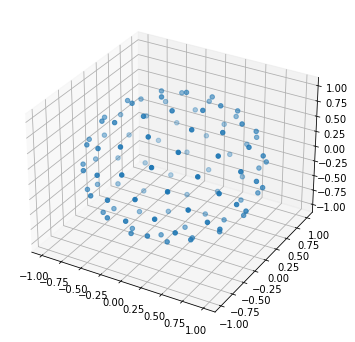

In [136]:
NUM_PTS = 100
indices = np.arange(0, NUM_PTS, dtype=float) + 0.5
phi = np.arccos(1 - 2*indices/NUM_PTS)
theta = np.pi * (1 + 5**0.5) * indices
x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)

print(x.shape,y.shape,z.shape) # each point represents a 3D direction vector
plt.figure(figsize=(6, 6)).add_subplot(111, projection='3d').scatter(x, y, z)
plt.show()


In [137]:
CENTER = np.array((-10, -30, 0)) # HARDCODED, GET FROM LIDAR POSE

for fid in range(1,2):
    lidar_points_file = 'LidarOutputs\\lidar_t'+str(fid)+'.npy'
    lidar_points_orig = np.load(lidar_points_file)
    print(lidar_points_orig.shape)
    rsr_signature = get_rsr_signature(lidar_points_orig, CENTER)
    print(lidar_points_file)
    print(rsr_signature)

(6155, 3)
(40, 3)
LidarOutputs\lidar_t1.npy
[60.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2. 60. 60. 20. 60. 60. 20. 30. 30. 60. 60. 60. 60. 60. 60. 60.
 60. 60. 60. 60.]
